In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler

In [2]:
banking_data = pd.read_csv('bank-full.csv')

In [3]:
#Check for banking information
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Check for any nan values in data.
banking_data.isnull().values.any()
# There are no missing values in column.

False

In [5]:
banking_data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [6]:
#Let's see the banking_data shape and head and tail.
print(f'Num of rows == {banking_data.shape[0]} and Num of columns == {banking_data.shape[1]}')
banking_data.head(10)

Num of rows == 45211 and Num of columns == 17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
banking_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
# First we convert all object to categorical type
for col in banking_data.columns:
    if banking_data[col].dtype == 'object':
        banking_data[col] = banking_data[col].astype('category')

In [9]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [10]:
#Generate descriptive statistics of banking data
banking_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [11]:
#Normalise function. Use this to remove skewness of data.
def normalise(column):
    upper = column.max()
    lower = column.min()
    normal = (column - lower)/(upper -lower)
    return normal

Univariate

Analysing Age

Skewness of age: 0.6848179257252598
Min age 18 and Max age 95


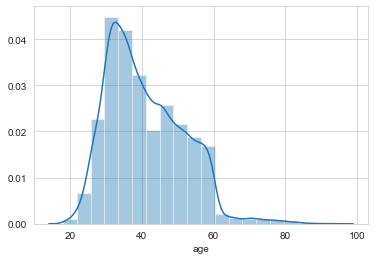

In [12]:
# Check for age distribution, 
sns.distplot(banking_data.age,bins=20)

#Let's check for skewness of age
print(f'Skewness of age: {banking_data.age.skew()}')

print(f'Min age {banking_data.age.min()} and Max age {banking_data.age.max()}')
# Age is positively skewed. And most of the age distributed within 20-60 age
# Almost distributed normally.
# Even though we can consider this.

descriptive statistics of age after applying log: 
count    45211.000000
mean         3.679433
std          0.254577
min          2.890372
25%          3.496508
50%          3.663562
75%          3.871201
max          4.553877
Name: age, dtype: float64


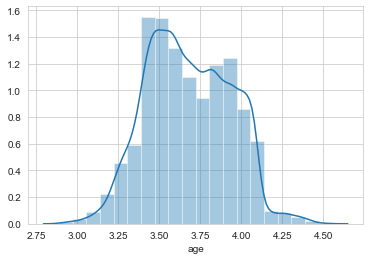

In [13]:
# Let's apply for np.log to 
print(f'descriptive statistics of age after applying log: \n{np.log(banking_data.age).describe().T}')
df = pd.DataFrame(np.log(banking_data.age),columns=['age'])
sns.distplot(df.age,bins=20)
# figure 1. show skewness of original age data 
# figure 2. show skewness of after aplying np.log to age data.

Min balance -8019 and Max balance 102127


8.360308326166326

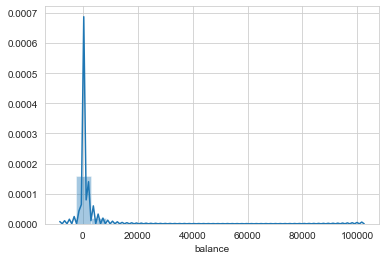

In [14]:
#Let's see the distribution of balance

sns.distplot(banking_data.balance,bins=20)
# We can see that, most of the balance is distributed within 0 to approximately 20K. 

print(f'Min balance {banking_data.balance.min()} and Max balance {banking_data.balance.max()}')

#Let's check skewness of balance
banking_data.balance.skew()

#Here, I can say, balance is skewed.

Min balance 1 and Max balance 31


0.09307901402122411

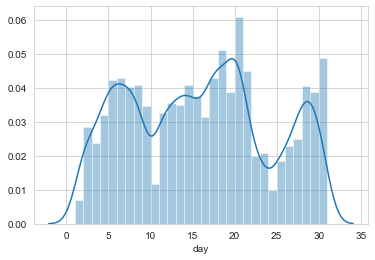

In [15]:
#Let's see the distribution of day

sns.distplot(banking_data.day,bins=30)
#Almost distributed normally

print(f'Min balance {banking_data.day.min()} and Max balance {banking_data.day.max()}')

#Let's check skewness of day
banking_data.day.skew()

Min duration 0 and Max duration 4918


3.144318099423456

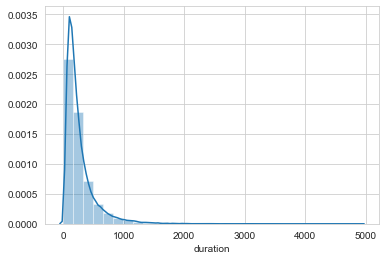

In [16]:
#Let's see the distribution of duration.

sns.distplot(banking_data.duration,bins=30)
# We can see that, most of the duration is distributed within 0 to approximately 1000 seconds

print(f'Min duration {banking_data.duration.min()} and Max duration {banking_data.duration.max()}')

#Let's check skewness of duration
banking_data.duration.skew()

# And this duration is positively skewed. 

In [17]:
#This is to verify, if duration is 0 waht would be the target.
banking_data[banking_data.duration == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


Min campaign 1 and Max campaign 63


3.144318099423456

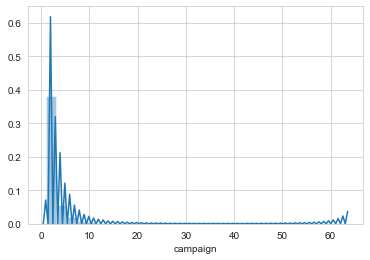

In [18]:
#Let's see the distribution of campaign.

sns.distplot(banking_data.campaign,bins=30)
# We can see that, most of the campaign is distributed within 0 to approximately 1000 seconds

print(f'Min campaign {banking_data.campaign.min()} and Max campaign {banking_data.campaign.max()}')

#Let's check skewness of campaign
banking_data.duration.skew()

# And this campaign is positively skewed.

Min pdays -1 and Max campaign 871
2.6157154736563477


pdays  Target
-1     no        33570
       yes        3384
 1     no            9
       yes           6
 2     no           35
       yes           2
 3     no            1
 4     no            1
       yes           1
 5     no           11
 6     no            9
       yes           1
 7     no            7
 8     no           25
 9     no            9
       yes           3
 10    yes           4
       no            2
 12    no            7
 13    no            3
       yes           3
 14    no            8
       yes           1
 15    no            3
 17    no            3
       yes           1
 18    no            1
 19    no            2
 20    no            1
       yes           1
                 ...  
 728   yes           1
 745   no            1
 749   yes           1
 756   no            1
 760   no            1
 761   yes           1
 769   yes           1
 771   no            1
 772   no            1
 774   no            1
 775   no            1
 776   yes          

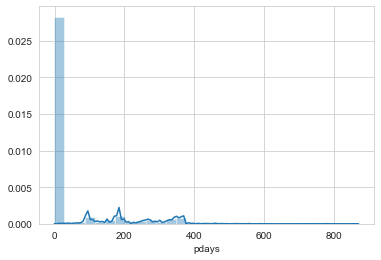

In [19]:
#Let's see the distribution of pdays.

sns.distplot(banking_data.pdays,bins=30)
# We can see that, most of the pdays is distributed with -1

print(f'Min pdays {banking_data.pdays.min()} and Max campaign {banking_data.pdays.max()}')

#Let's check skewness of pdays
print(banking_data.pdays.skew())

# And this pdays is positively skewed.

#check how pdays data are distributted with Target.
banking_data.groupby('pdays')['Target'].value_counts()

In [20]:
# After seeing the distribution of pdays with Target, most of the data lies in -1.
# And here, I'm assuming that there can not be -1 pdays. Either pdays has to 0 'zero' or not previously contacted.
# So we replace -1 with 999 as not contacted.

def replacePdays_lessThan_0(df):
    df = df
    replaceValue = 999
    df.pdays[df.pdays == -1] = replaceValue
    df.pdays = df.pdays.astype(int)
    return df
banking_data = replacePdays_lessThan_0(banking_data)
# Unique vales of Experience after replacing with mean.
banking_data.pdays.unique()

array([999, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

Min previous 0 and Max previous 4918


41.84645447266292

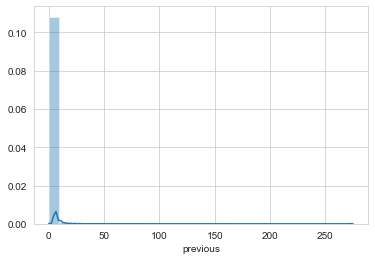

In [21]:
#Let's see the distribution of previous.

sns.distplot(banking_data.previous,bins=30)
# We can see that,most of the previous is distributed with 0. Means most of the time not contacted before the campaign.

print(f'Min previous {banking_data.previous.min()} and Max previous {banking_data.duration.max()}')

#Let's check skewness of duration
banking_data.previous.skew()

# And this duration is positively skewed. 

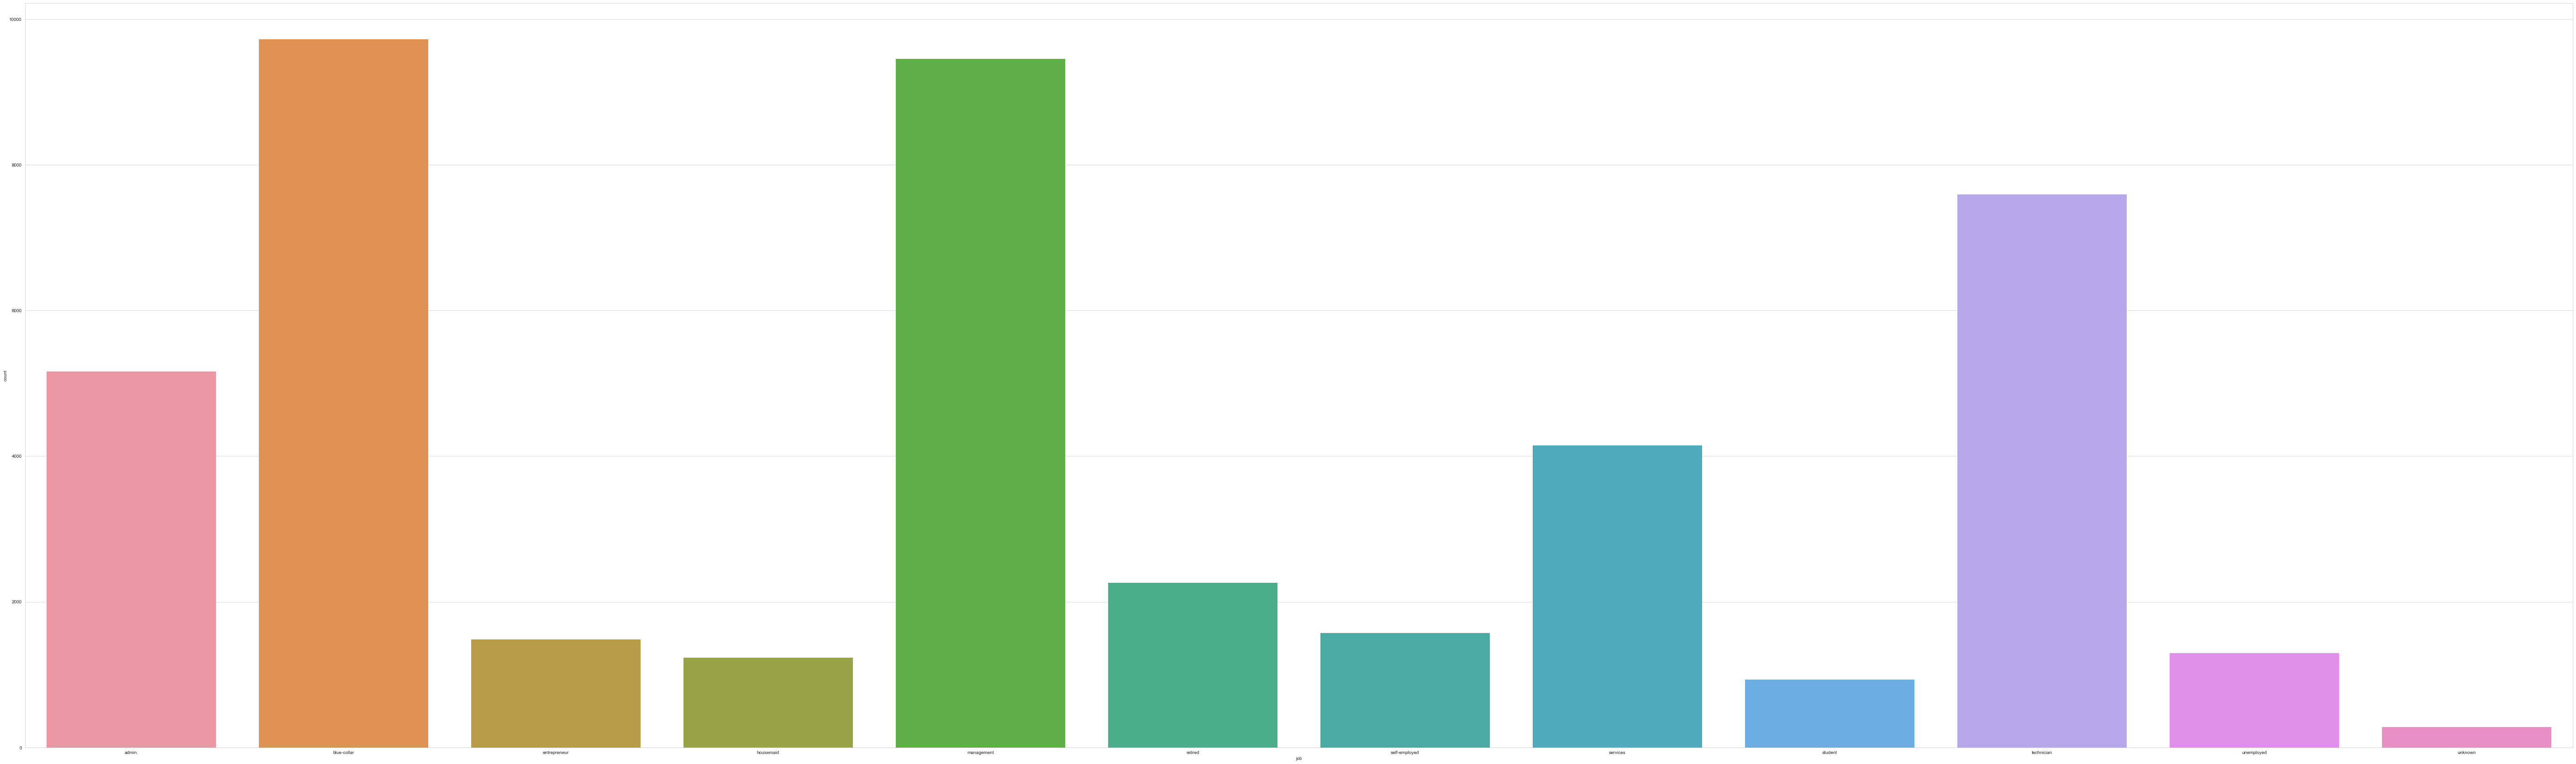

In [22]:
# Let's check the job distribution
plt.figure(figsize=(100,30))
sns.countplot(banking_data.job)

In [23]:
job_cat_name = np.array(banking_data.job.unique())
print(job_cat_name)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [24]:
for job_name in job_cat_name:
    print(f'job name:{job_name} -- {len(banking_data.loc[banking_data.job == job_name])} ({np.round(len(banking_data.loc[banking_data.job == job_name])/len(banking_data.index) * 100,2)}%)')

job name:management -- 9458 (20.92%)
job name:technician -- 7597 (16.8%)
job name:entrepreneur -- 1487 (3.29%)
job name:blue-collar -- 9732 (21.53%)
job name:unknown -- 288 (0.64%)
job name:retired -- 2264 (5.01%)
job name:admin. -- 5171 (11.44%)
job name:services -- 4154 (9.19%)
job name:self-employed -- 1579 (3.49%)
job name:unemployed -- 1303 (2.88%)
job name:housemaid -- 1240 (2.74%)
job name:student -- 938 (2.07%)


In [25]:
banking_data.groupby('job').Target.value_counts()

job            Target
admin.         no        4540
               yes        631
blue-collar    no        9024
               yes        708
entrepreneur   no        1364
               yes        123
housemaid      no        1131
               yes        109
management     no        8157
               yes       1301
retired        no        1748
               yes        516
self-employed  no        1392
               yes        187
services       no        3785
               yes        369
student        no         669
               yes        269
technician     no        6757
               yes        840
unemployed     no        1101
               yes        202
unknown        no         254
               yes         34
Name: Target, dtype: int64

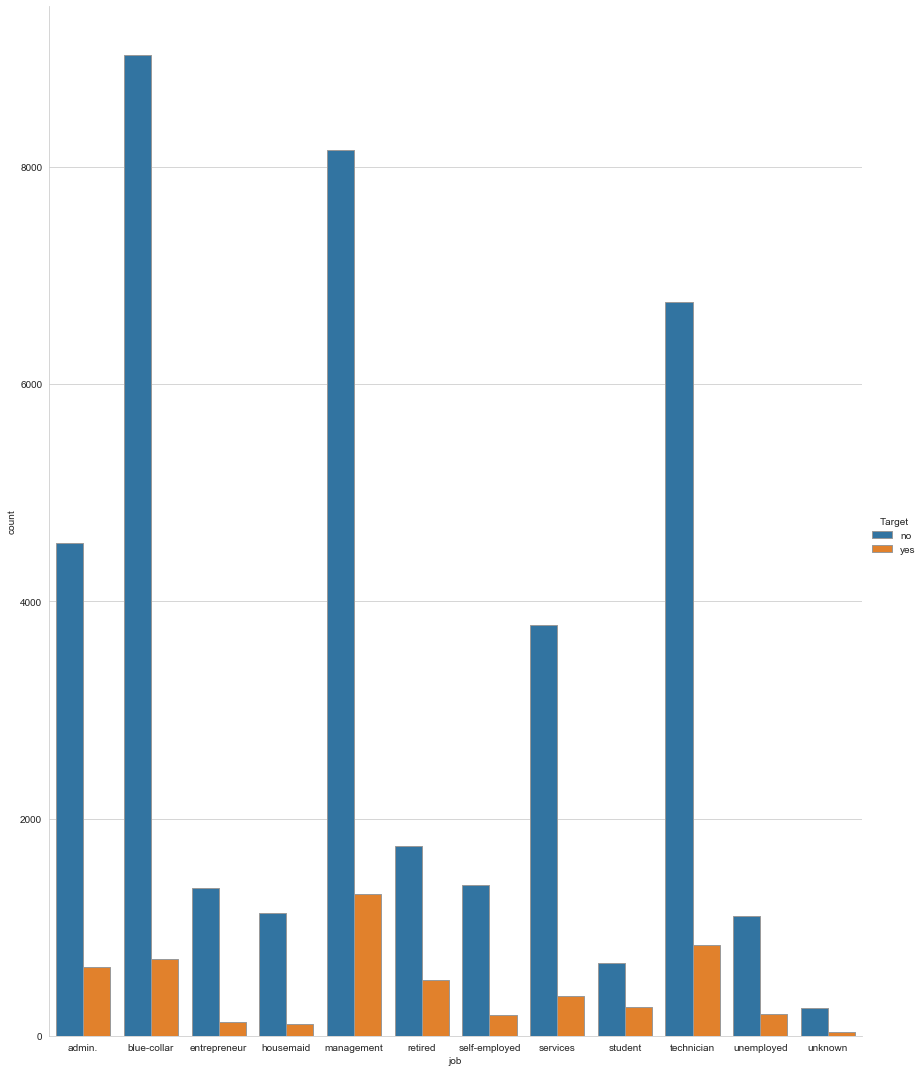

In [26]:
sns.catplot('job',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=15,aspect=0.8)

In [27]:
# df = banking_data
# df['job'] = df.job.replace('unknown','student')
# df.job.value_counts()

In [28]:
# sns.catplot('job',hue='Target',kind='count', edgecolor='.6',data=df,height=15,aspect=0.8)

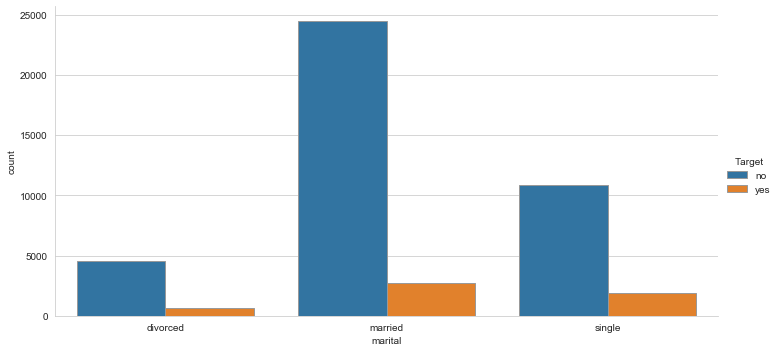

In [29]:
sns.catplot('marital',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=2.0)

* Here we can see that, most of the distributted in married  category
* This means,we can say that, bank has conatcted to married people. In that very less people subscribed for the product.

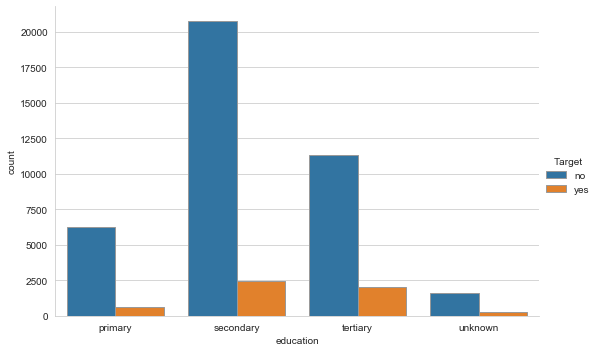

In [30]:
sns.catplot('education',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

In [31]:
for col in banking_data.education.unique():
    print(f'column name :{col} -- {len(banking_data.loc[banking_data.education == col])} ({np.round(len(banking_data.loc[banking_data.education == col])/len(banking_data.index) * 100,2)}%)')

column name :tertiary -- 13301 (29.42%)
column name :secondary -- 23202 (51.32%)
column name :unknown -- 1857 (4.11%)
column name :primary -- 6851 (15.15%)


* Here we can see that, most of the distributted in secondary and tertiary  education category.
* This means,we can say that, bank has conatcted to educated people. In that very less people subscribed for the product.

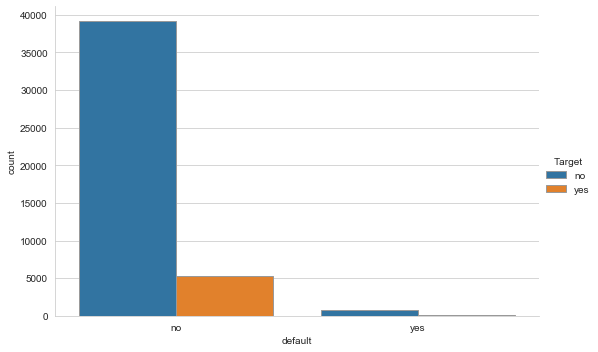

In [32]:
sns.catplot('default',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

In [33]:
banking_data.default.unique()

[no, yes]
Categories (2, object): [no, yes]

In [34]:
for val in banking_data.default.unique():
    print(f'column name :{val} -- {len(banking_data.loc[banking_data.default == val])} ({np.round(len(banking_data.loc[banking_data.default == val])/len(banking_data.index) * 100,2)}%)')
    

column name :no -- 44396 (98.2%)
column name :yes -- 815 (1.8%)


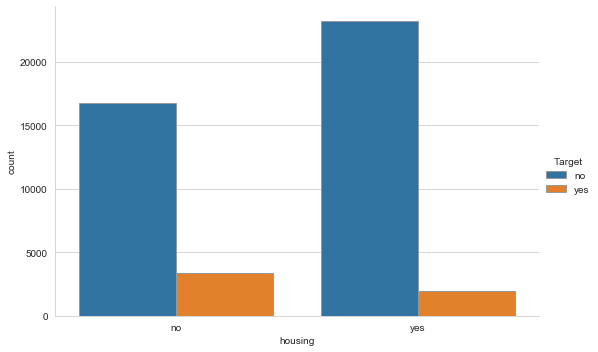

In [35]:
sns.catplot('housing',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* Here, we can see that, almost data distributted normaly.
* The bank has contected to people who has housing loan.
* And customers who does not have hosuing loan, have subscribed for the product.

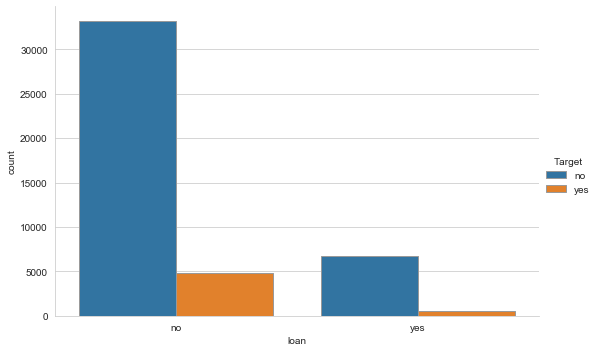

In [36]:
sns.catplot('loan',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* The bank has contacted to people who does not have personal loan.

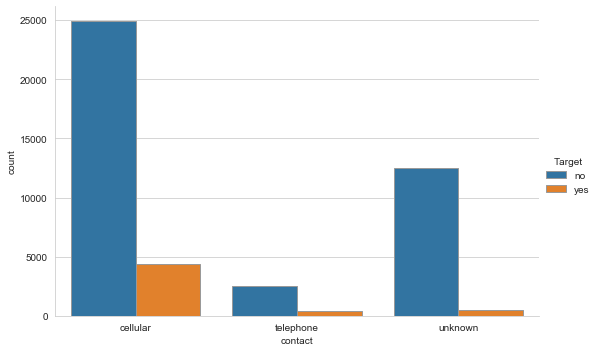

In [37]:
sns.catplot('contact',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* The bank has contacted to people through cellular
* And very less customers have opted/subscribed.

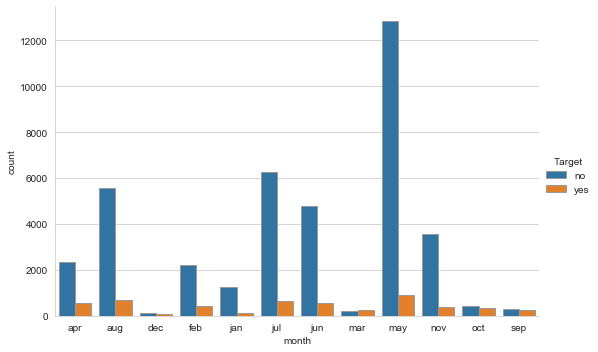

In [38]:
sns.catplot('month',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* Maximum contacts have made in the month of may.But very less subscriptio have made.
* But, in the month of oct, sep, mar and dec , thae bank has made very contacts but most of the customer have made subcription.

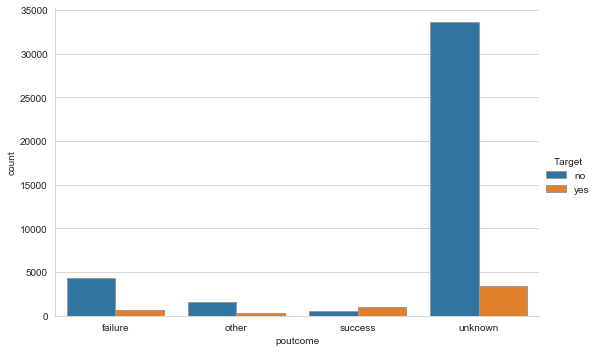

In [39]:
sns.catplot('poutcome',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* Here, we can combine unkown and other categroy data, and dervie new category as 'nonexistent'.

In [40]:
# Let's  check count of each categorical feature.
print(banking_data.job.value_counts())
print(banking_data.contact.value_counts())
print(banking_data.marital.value_counts())
print(banking_data.education.value_counts())
print(banking_data.default.value_counts())
print(banking_data.housing.value_counts())
print(banking_data.loan.value_counts())
print(banking_data.month.value_counts())
print(banking_data.poutcome.value_counts())
print(banking_data.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [41]:
# Let's do oneHotEncoding to 'marital' ,'contact' ,'loan', 'housing' and 'default'
oneHot_cols = ['marital' ,'contact']
banking_data = pd.get_dummies(banking_data,columns=oneHot_cols)

In [42]:
banking_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,management,tertiary,no,2143,yes,no,5,may,261,...,999,0,unknown,no,0,1,0,0,0,1
1,44,technician,secondary,no,29,yes,no,5,may,151,...,999,0,unknown,no,0,0,1,0,0,1
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,...,999,0,unknown,no,0,1,0,0,0,1
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,...,999,0,unknown,no,0,1,0,0,0,1
4,33,unknown,unknown,no,1,no,no,5,may,198,...,999,0,unknown,no,0,0,1,0,0,1


In [43]:
banking_data.poutcome = banking_data.poutcome.replace(['unknown','other'],'nonexistent')

In [44]:
banking_data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [45]:
replaceWith = {
                "job": {"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.":4,"services":5,"retired":6,"self-employed":7,"entrepreneur":8,"unemployed":9,"student":10,"housemaid":11,"unknown":0},
                "education": {"secondary": 1, "tertiary": 2 ,"primary":3,"unknown":0},
                "month": {"may": 1, "jul": 2 ,"aug": 3 ,"jun":4,"nov":5,"apr":6,"feb":7,"jan":8,"oct":9,"sep":10,"mar":11,"dec":12},
                "poutcome":{"nonexistent": 1, "failure": 2 ,"success": 3 },
                "Target": {"no":0,"yes":1},
                "housing": {"no":2,"yes":1},
                "default": {"no":2,"yes":1},
                "loan": {"no":2,"yes":1}
                }

In [46]:
banking_data = banking_data.replace(replaceWith)

In [47]:
banking_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,2,2,2,2143,1,2,5,1,261,...,999,0,1,0,0,1,0,0,0,1
1,44,3,1,2,29,1,2,5,1,151,...,999,0,1,0,0,0,1,0,0,1
2,33,8,1,2,2,1,1,5,1,76,...,999,0,1,0,0,1,0,0,0,1
3,47,1,0,2,1506,1,2,5,1,92,...,999,0,1,0,0,1,0,0,0,1
4,33,0,0,2,1,2,2,5,1,198,...,999,0,1,0,0,0,1,0,0,1


In [48]:
banking_data.tail()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
45206,51,3,2,2,825,2,2,17,5,977,...,999,0,1,1,0,1,0,1,0,0
45207,71,6,3,2,1729,2,2,17,5,456,...,999,0,1,1,1,0,0,1,0,0
45208,72,6,1,2,5715,2,2,17,5,1127,...,184,3,3,1,0,1,0,1,0,0
45209,57,1,1,2,668,2,2,17,5,508,...,999,0,1,0,0,1,0,0,1,0
45210,37,8,1,2,2971,2,2,17,5,361,...,188,11,1,0,0,1,0,1,0,0


In [49]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
age                  45211 non-null int64
job                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
marital_divorced     45211 non-null uint8
marital_married      45211 non-null uint8
marital_single       45211 non-null uint8
contact_cellular     45211 non-null uint8
contact_telephone    45211 non-null uint8
contact_unknown      45211 non-null uint8
dtypes: i

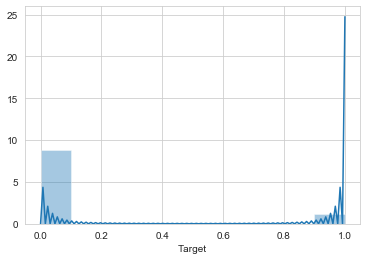

In [50]:
sns.distplot(banking_data.Target,bins=10)

In [51]:
print(f'no data: {len(banking_data.Target[banking_data.Target == 0])} ({np.round(len(banking_data.Target[banking_data.Target == 0])/len(banking_data.index)*100,2)})%')
print(f'yes data: {len(banking_data.Target[banking_data.Target == 1])} ({np.round(len(banking_data.Target[banking_data.Target == 1])/len(banking_data.index)*100,2)})%')

no data: 39922 (88.3)%
yes data: 5289 (11.7)%


* As we can see data is not distributed properly.
* Data is imbalanced.
* So we use over sampling technique to ovecome this propblem

Target
0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

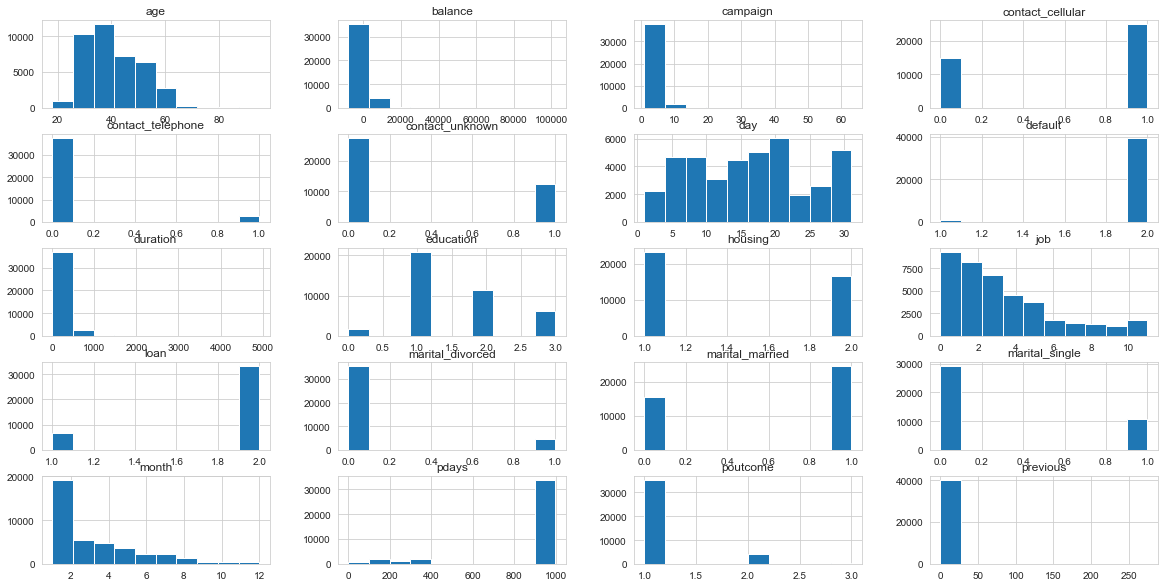

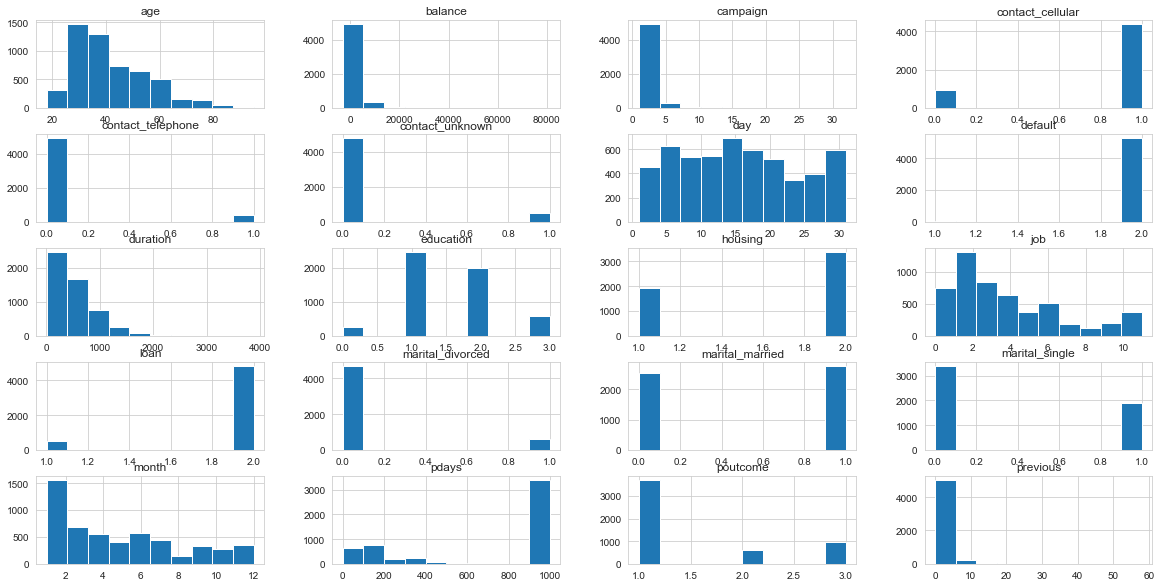

In [52]:
banking_data.groupby('Target').hist(figsize=(20,10))

* First half of the above hist graph shows distribution of 'Target' 0 'Zero' accross feature columns
* And second half of the above hist graph shows distribution of 'Target' 1 'One' accross feature columns
* We can see that month is normaly distributted in "Target=1" but positively skewed in "Targte =0".
* And 'day'and 'age' almost normaly distributted in both cases.

In [53]:
corr = banking_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
age,1,0.0767952,0.112785,0.0178793,0.0977827,0.185513,0.0156553,-0.00912005,0.0897167,-0.00464843,0.00476031,-0.00880435,0.00128832,0.0244446,0.025155,0.164674,0.286257,-0.427817,-0.0683752,0.170349,-0.0201317
job,0.0767952,1,-0.0514273,3.04066e-05,0.0168986,0.152008,0.0222489,-0.00588588,0.10732,0.0066773,-0.0296969,-0.0154171,-0.00139554,0.0219902,0.0549268,0.0309429,-0.0525138,0.0351407,0.0276392,0.0559037,-0.0594329
education,0.112785,-0.0514273,1,0.00696257,0.0314179,0.0353375,0.0250332,-0.005209,0.0143642,-0.00262,0.0146243,0.0137319,0.000110981,-0.0116009,-0.00135902,-0.00785168,0.0701239,-0.0706454,-0.006004,0.0302559,-0.0100528
default,0.0178793,3.04066e-05,0.00696257,1,0.0667451,-0.00602522,0.0772342,-0.0094239,0.0337313,0.0100215,-0.0168215,-0.0404532,0.0183294,0.036096,0.022419,-0.0177769,0.0144596,-0.0031152,0.0100611,0.017208,-0.0199329
balance,0.0977827,0.0168986,0.0314179,0.0667451,1,0.0687683,0.0843502,0.00450259,0.0928525,0.0215604,-0.0145783,-0.0373603,0.0166736,0.0355707,0.0528384,-0.0217316,0.0257081,-0.012537,0.0158796,0.0379985,-0.0373307
housing,0.185513,0.152008,0.0353375,-0.00602522,0.0687683,1,0.0413229,0.0279816,0.270254,-0.00507545,0.0235987,0.0400954,-0.0370761,-0.000783702,0.139173,-0.00177803,-0.0176807,0.0204755,0.156071,0.0808222,-0.208409
loan,0.0156553,0.0222489,0.0250332,0.0772342,0.0843502,0.0413229,1,-0.0113702,0.0600785,0.012412,-0.00997985,-0.0322543,0.0110435,0.043474,0.068185,-0.0163768,-0.0369056,0.0517159,-0.0136039,0.0131832,0.00721056
day,-0.00912005,-0.00588588,-0.005209,-0.0094239,0.00450259,0.0279816,-0.0113702,1,-0.0380195,-0.0302063,0.16249,0.0790737,-0.0517105,-0.0701618,-0.0283478,-0.000433111,0.00710237,-0.00741185,0.0201858,0.0236522,-0.0341035
month,0.0897167,0.10732,0.0143642,0.0337313,0.0928525,0.270254,0.0600785,-0.0380195,1,0.0140972,-0.0938288,-0.249568,0.124014,0.208377,0.20703,-0.0128022,-0.0237989,0.0349382,0.263902,0.0779596,-0.320607
duration,-0.00464843,0.0066773,-0.00262,0.0100215,0.0215604,-0.00507545,0.012412,-0.0302063,0.0140972,1,-0.0845695,-0.00509019,0.00120306,0.0203453,0.394521,0.00609989,-0.0226829,0.0203284,0.0255429,-0.0232011,-0.0143792


##### As we can see that, there is very less correlations in between features.

* As I can see correlations between features are
* Age-marital_married = 0.286
* Age-marital_divorced = 0.16
* Age-Education = 0.112
* Previous-Month = 0.124
* poutcome-Month = 0.2
* poutcome-previous = 0.39
* contact_cellular-Month = 0.2639
* contact_telephone-Age = 0.17
* contact-poutcome = 0.218
* contact_unkown-housing = 0.208
* contact_unkown-pdays = 0.29

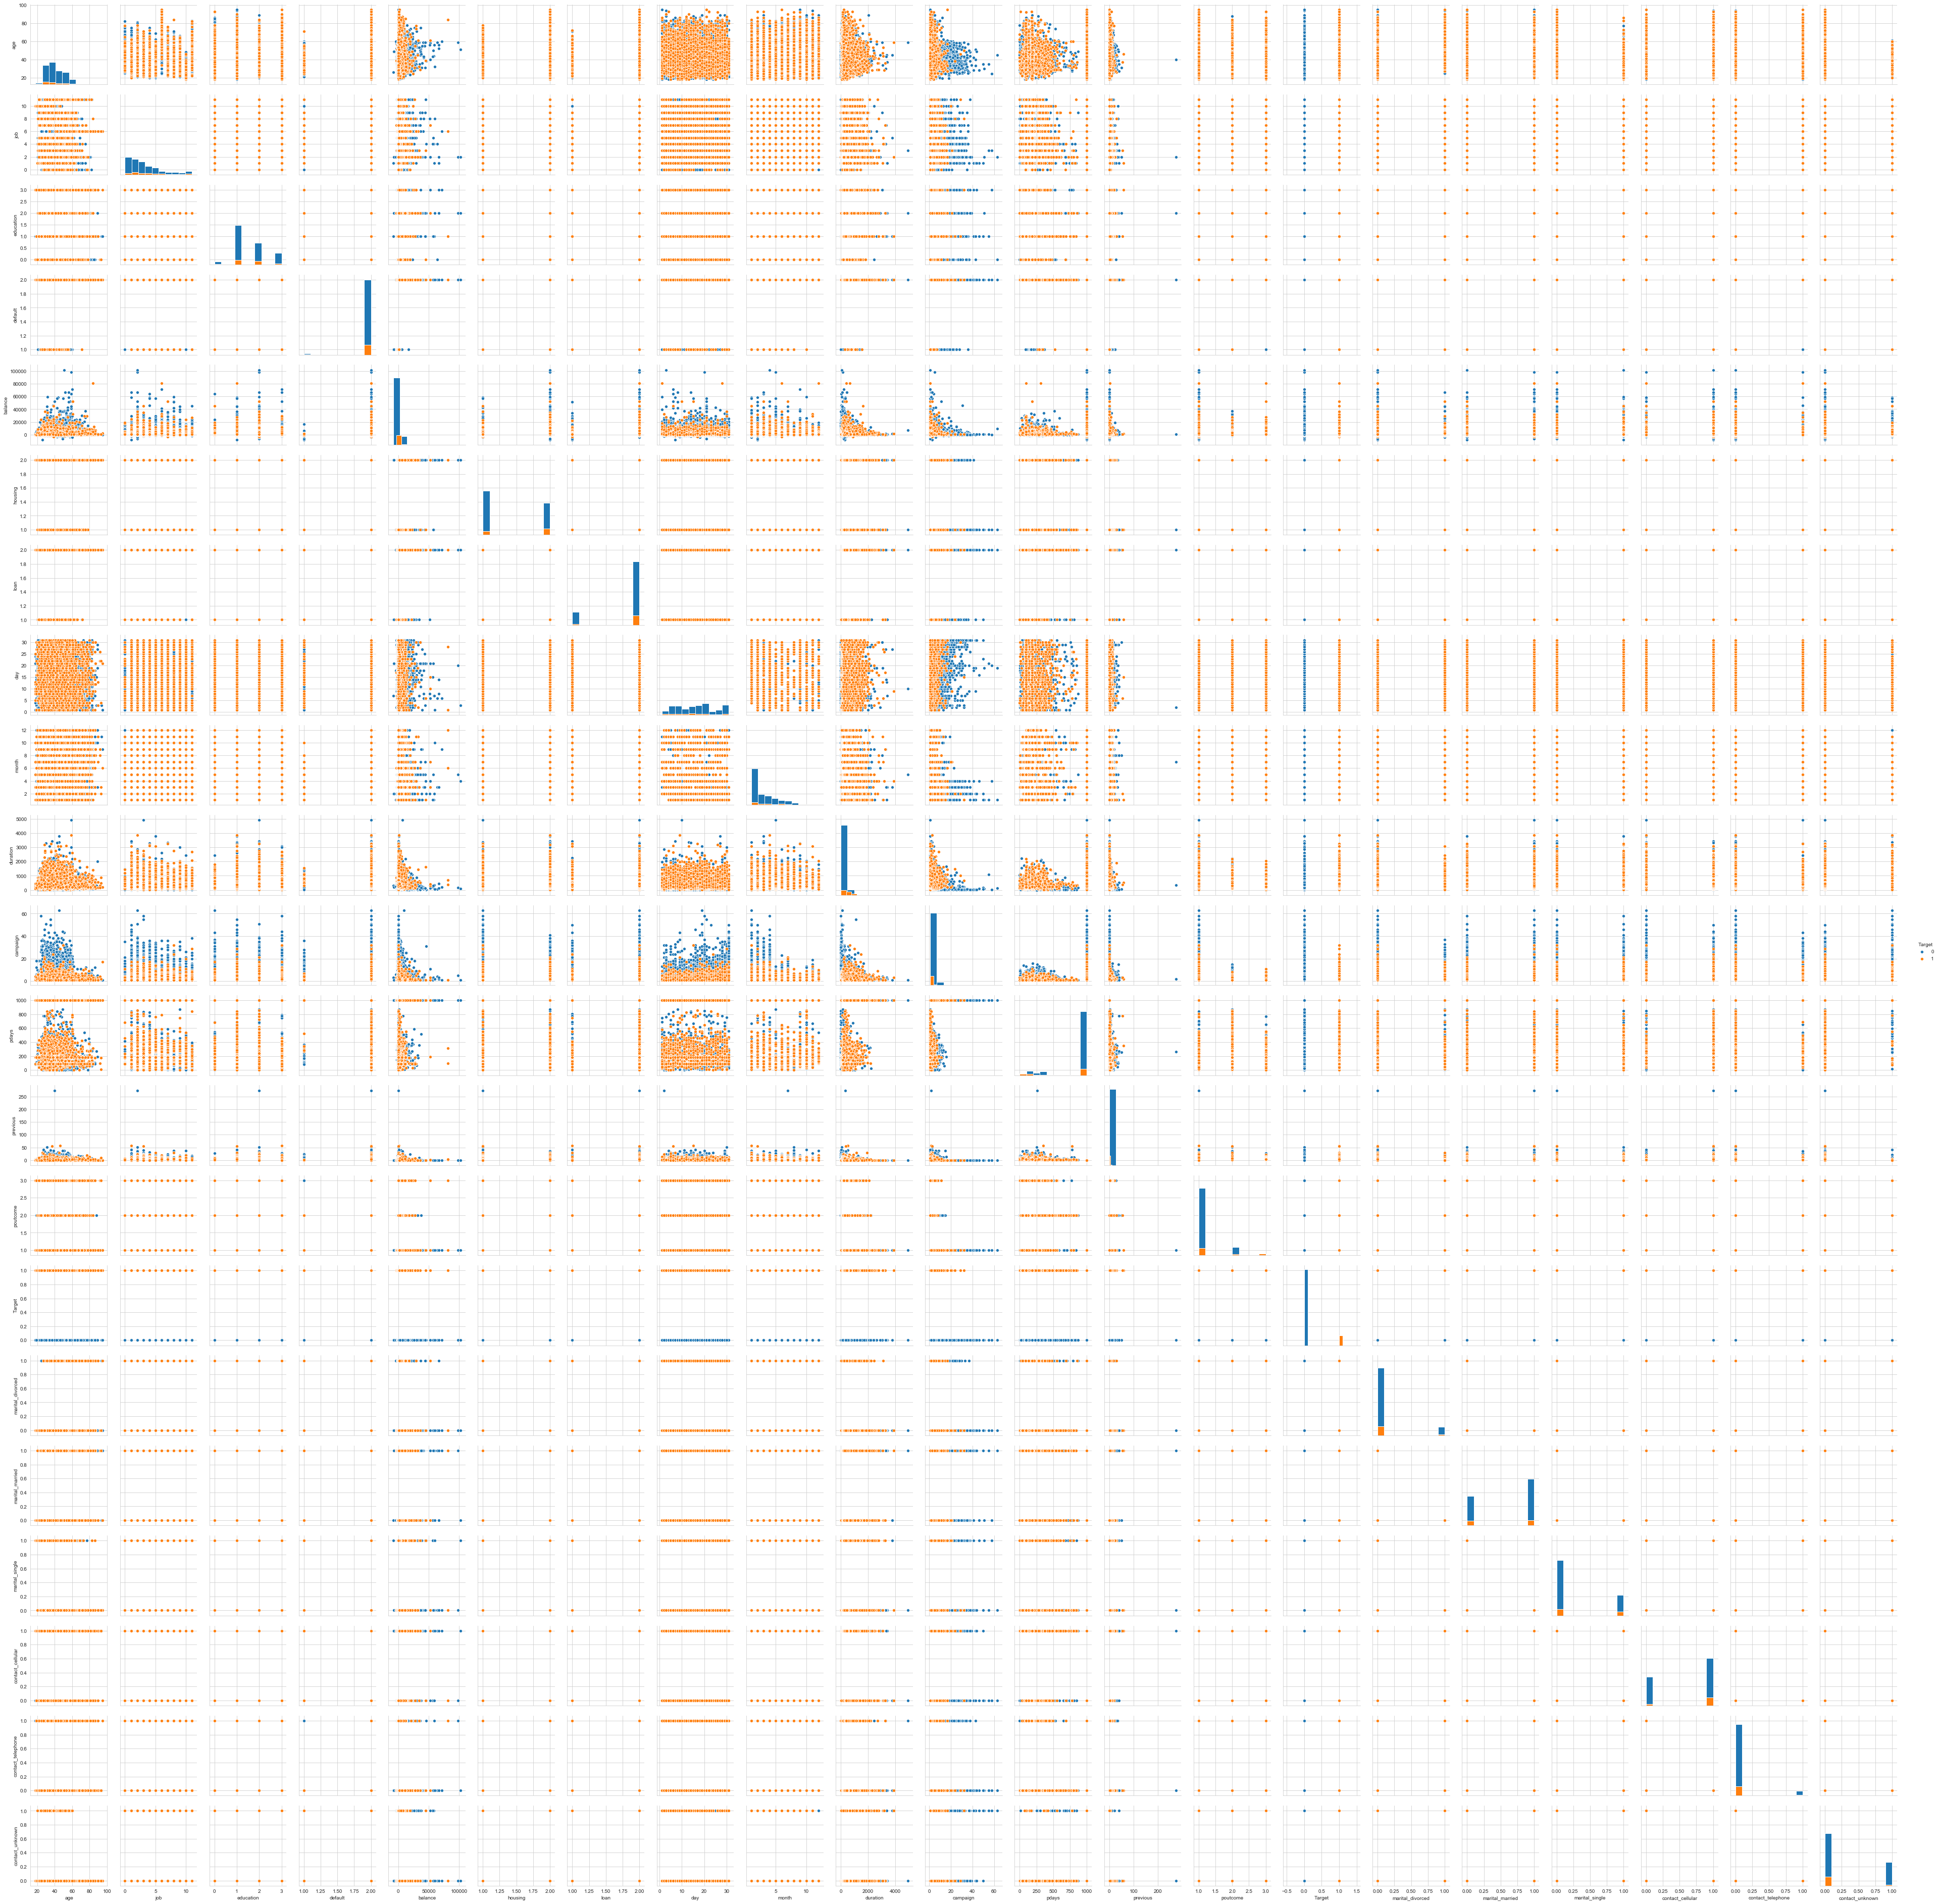

In [96]:
sns.pairplot(banking_data,hue='Target',diag_kind='hist')

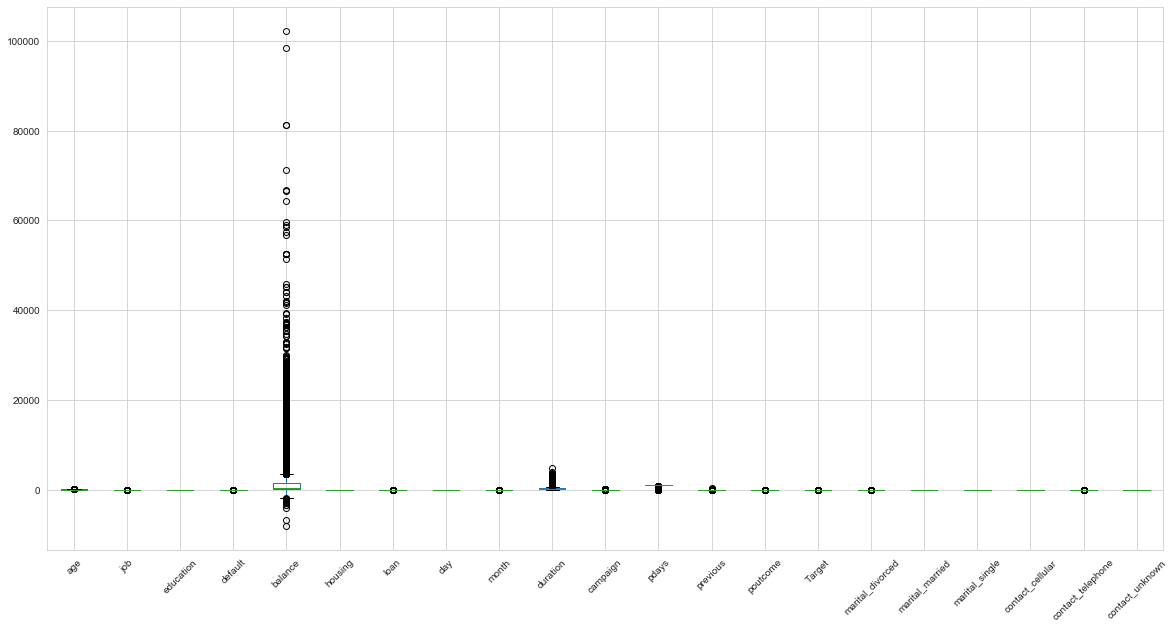

In [95]:
banking_data.boxplot(figsize=(20,10),rot=45)

In [55]:
from scipy.stats import chi2_contingency,chi2

In [56]:
df = banking_data.drop(columns=['balance']) # can not expects -ve values, so dropping banlance

In [57]:
cols = ['job','marital_single','default','loan']

In [58]:
banking_data.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'Target', 'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype='object')

In [59]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
age                  45211 non-null int64
job                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
marital_divorced     45211 non-null uint8
marital_married      45211 non-null uint8
marital_single       45211 non-null uint8
contact_cellular     45211 non-null uint8
contact_telephone    45211 non-null uint8
contact_unknown      45211 non-null uint8
dtypes: i

In [60]:
chi, pval, dof, exp = chi2_contingency(banking_data[cols])
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance(alpha), we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance(alpha), we accept the null hypotheses. 
They are independent.""" % (significance))


p-value is:  1.0
chi=73776.397108, critical value=136487.818495

At 0.05 level of significance(alpha), we accept the null hypotheses. 
They are independent.


In [61]:
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print("""At %.2f level of significance(alpha), we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance(alpha), we accept the null hypotheses. 
They are independent.""" % (significance))


p-value=1.000000, significance=0.05

At 0.05 level of significance(alpha), we accept the null hypotheses. 
They are independent.


* As the Chi-Square p-value is greater than alpha and chi is lesser than critical_value.
* So we accept that those all categorical variables are independent. 
* So we can drop all of these features ('job','marital_single','default' and'loan').

In [62]:
final_df = banking_data.drop(columns=cols)

In [63]:
final_df.columns

Index(['age', 'education', 'balance', 'housing', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target',
       'marital_divorced', 'marital_married', 'contact_cellular',
       'contact_telephone', 'contact_unknown'],
      dtype='object')

# SMOTE 

In [64]:
X = final_df.drop(columns=['Target'])
y = final_df.Target

In [65]:
# Here, I am using over smapling technique to increase or match the minority labels with majority labels.
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X,y)

Using TensorFlow backend.


### Train, Test and split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,train_size=0.7, test_size=0.3, random_state=42)

In [72]:
X_test_data = pd.DataFrame(X_test,columns=X.columns)
y_test_data = pd.DataFrame(y_test,columns=['Target'])
smote_test_df = pd.concat([X_test_data,y_test_data],axis=1)

In [78]:
#MinMaxScale: It rescale the data in to 0,1. And it preserves the shape of original dirtribution.
minMaxScale = MinMaxScaler()
X_train = minMaxScale.fit_transform(X_train)
X_test = minMaxScale.fit_transform(X_test)

## Common code

In [80]:
ns_probs = [0 for _ in range(len(y_test))]

In [83]:
def drawROC_Curve(y_true,y_pred,model_name):
    roc_score = roc_auc_score(y_true,y_pred)
    ns_fpr,ns_tpr, ns_threshold = roc_curve(y_true,y_pred)
    fpr,tpr, threshold = roc_curve(y_true,y_pred)
    plt.plot(ns_fpr,ns_tpr,linestyle='--', label="No skill")
    plt.plot(fpr,tpr,linestyle='solid',label=f'Model name: {model_name} and rocs_Scoreis: {roc_score}')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()

In [87]:
def printConfusionMatrix(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    report = classification_report(y_true,y_pred)
    print(f'Confusion Matrix: {cm} \n')
    print(f'Classidfication Report: {report}')
    cm_df = pd.DataFrame(cm,index=[i for i in ['01']], columns=[i for i in ['01']])
    sns.heatmap(cm_df,annot=True)
    return cm

### 